# KNN implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('titanic_cleaned_data.csv')
data.head()

,Unnamed: 0,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Ticket_CA 2144,Ticket_CA. 2343,Ticket_LINE,Ticket_PC 17757,Ticket_S.O.C. 14879,Embarked_C,Embarked_Q,Embarked_S,Survived,Age
0,0,7.2500,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,22.0
1,1,71.2833,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,38.0
2,2,7.9250,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,1,26.0
3,3,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,35.0
4,4,8.0500,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,35.0


In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Ticket_CA 2144,Ticket_CA. 2343,Ticket_LINE,Ticket_PC 17757,Ticket_S.O.C. 14879,Embarked_C,Embarked_Q,Embarked_S,Survived,Age
0,7.2500,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,22.0
1,71.2833,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,38.0
2,7.9250,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,26.0
3,53.1000,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,35.0
4,8.0500,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,35.0


### Seperating the independent and target variables

In [5]:
x = data.drop(['Survived'],axis=1)
y = data['Survived']

x.shape, y.shape

((891, 34), (891,))

### Scaling the data using MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
x = pd.DataFrame(x_scaled, columns=x.columns)
x.head()

,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Ticket_382652,Ticket_CA 2144,Ticket_CA. 2343,Ticket_LINE,Ticket_PC 17757,Ticket_S.O.C. 14879,Embarked_C,Embarked_Q,Embarked_S,Age
0,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.271174
1,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.472229
2,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.321438
3,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.434531
4,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.434531


### Splitting the data using TrainTestSplit

In [8]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y, random_state=42, stratify=y)

### Implementing KNN classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [11]:
# leaving the k value as 5 default.
knn = KNN(n_neighbors=5)

# training the data
knn.fit(train_x, train_y)

# predecting the data
test_predict = knn.predict(test_x.values)

# testing the f1_score
score = f1_score(test_predict, test_y)
print("Test f1_score: ",score)

Test f1_score:  0.6708074534161491


### Elbow curve

In [12]:
def elbow(k):
    
    error = []
    
    for i in k:
        knn = KNN(n_neighbors=i)
        knn.fit(train_x, train_y)
        t_predict = knn.predict(test_x.values)
        k = f1_score(t_predict, test_y)
        temp = 1-k
        error.append(temp)
        
    return error

In [13]:
k = range(1, 50, 2)

In [14]:
test = elbow(k)

### Plotting the Elbow curve.

Text(0, 0.5, 'Error')

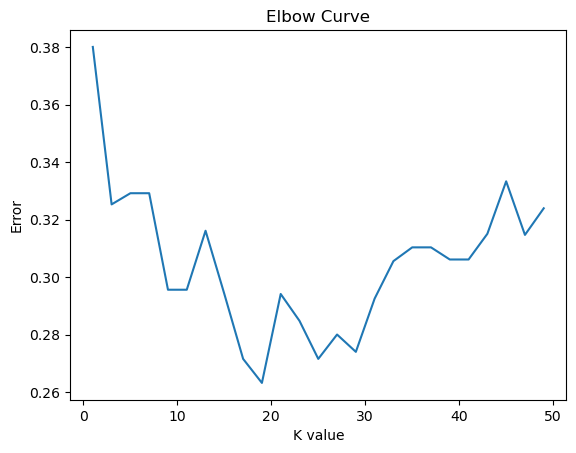

In [15]:
plt.plot(k, test)
plt.title('Elbow Curve')
plt.xlabel("K value")
plt.ylabel("Error")

In [18]:
# leaving the k value as 5 default.
knn = KNN(n_neighbors=19)

# training the data
knn.fit(train_x, train_y)

# predecting the data
test_predict = knn.predict(test_x.values)

# testing the f1_score
score = f1_score(test_predict, test_y)
print("Test f1_score: ",score)

Test f1_score:  0.736842105263158
